<a href="https://colab.research.google.com/github/gagan3754/Jamboree-Education---Linear-Regression/blob/main/Jamboree_Education_Linear_Regression_Business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/Jamboree_Admission.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df['Chance of Admit ']

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


There are no duplicates

In [13]:
df.shape

(500, 9)

In [14]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [15]:
df.columns=df.columns.str.strip()

In [16]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [17]:
df.drop_duplicates(keep='first',inplace=True)

In [18]:
df.shape

(500, 9)

#Univariate Analysis

In [19]:
df=df.drop(columns='Serial No.')

In [20]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
cols=['University Rating','SOP','LOR','Research']

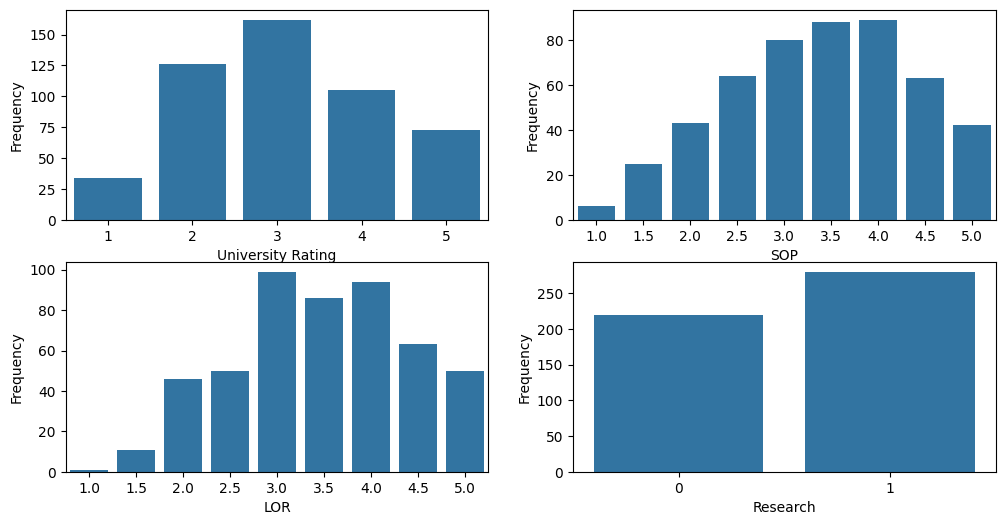

In [22]:
plt.figure(figsize=(12,6))
count=1
for i in cols:
  plt.subplot(2,2,count)
  sns.countplot(data=df,x=i)
  plt.xlabel(i)
  plt.ylabel('Frequency')
  count+=1
plt.show()

In [23]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

<Axes: xlabel='TOEFL Score', ylabel='Count'>

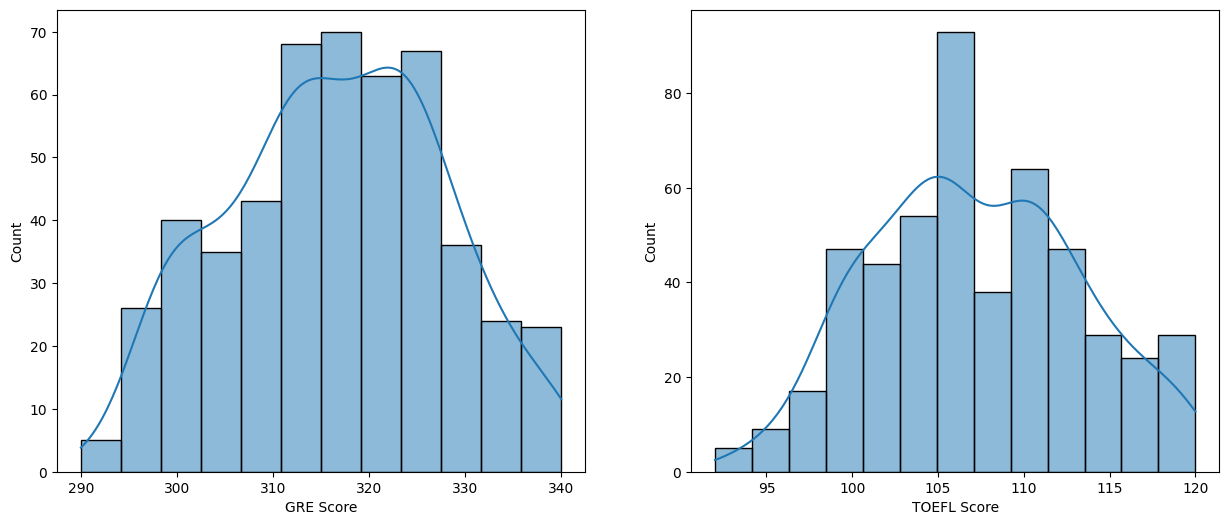

In [24]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.histplot(data=df,x='GRE Score',ax=ax[0],kde=True)
sns.histplot(data=df,x='TOEFL Score',ax=ax[1],kde=True)

Boxplot

In [25]:
col=['GRE Score','TOEFL Score']

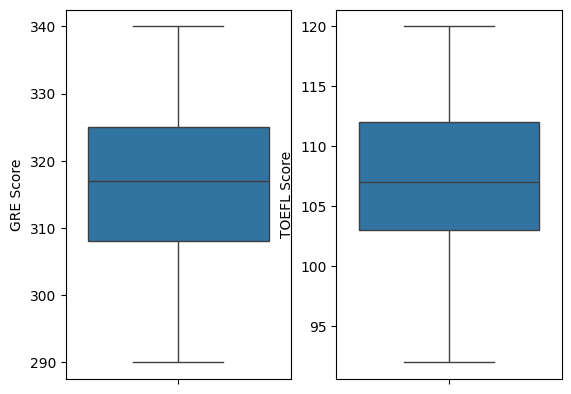

In [26]:
count=1
for i in col:
  plt.subplot(1,2,count)
  sns.boxplot(data=df,y=i)
  count+=1
plt.show()

#Bivariate Analysis

Barplots

In [27]:
col=['University Rating','LOR','Research']

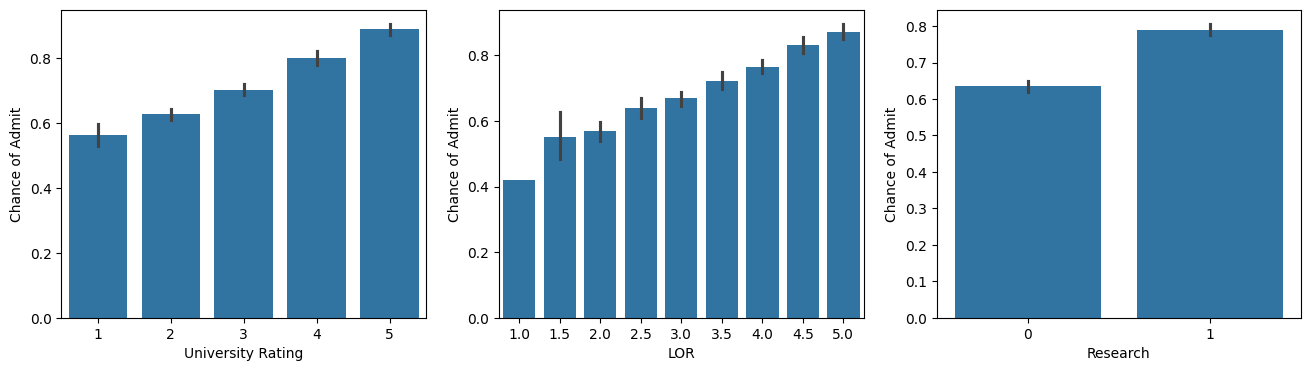

In [28]:
count=1
plt.figure(figsize=(16,4))
for i in col:
  plt.subplot(1,3,count)
  sns.barplot(data=df,x=i,y='Chance of Admit')
  count+=1
plt.show()

Scatterplot

In [29]:
col=['GRE Score', 'TOEFL Score']

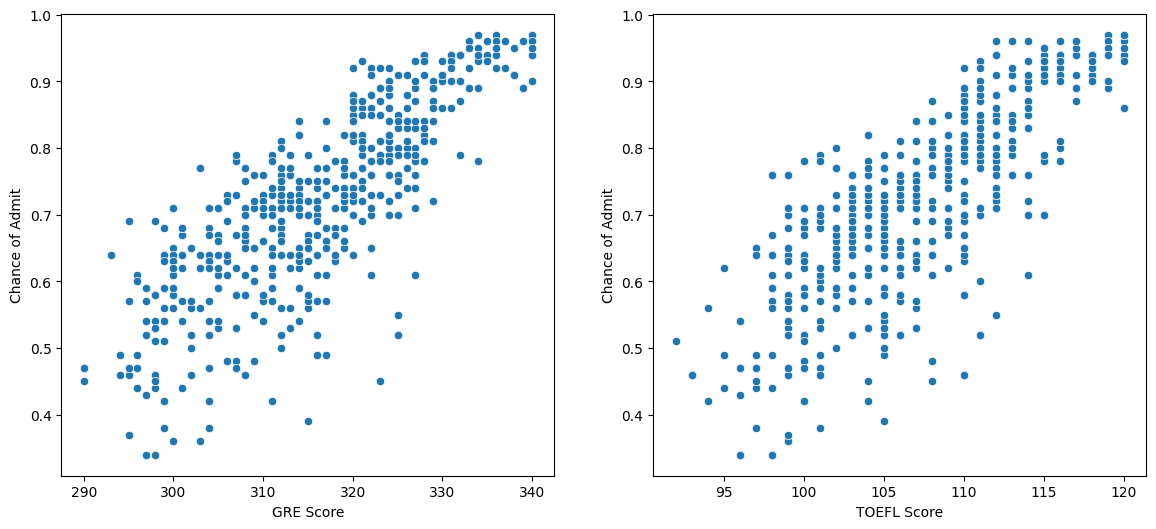

In [30]:
count=1
plt.figure(figsize=(14,6))
for i in col:
  plt.subplot(1,2,count)
  sns.scatterplot(data=df,x=i,y='Chance of Admit')
  plt.xlabel(i)
  plt.ylabel('Chance of Admit')
  count+=1
plt.show()

#Multi Variate Analysis

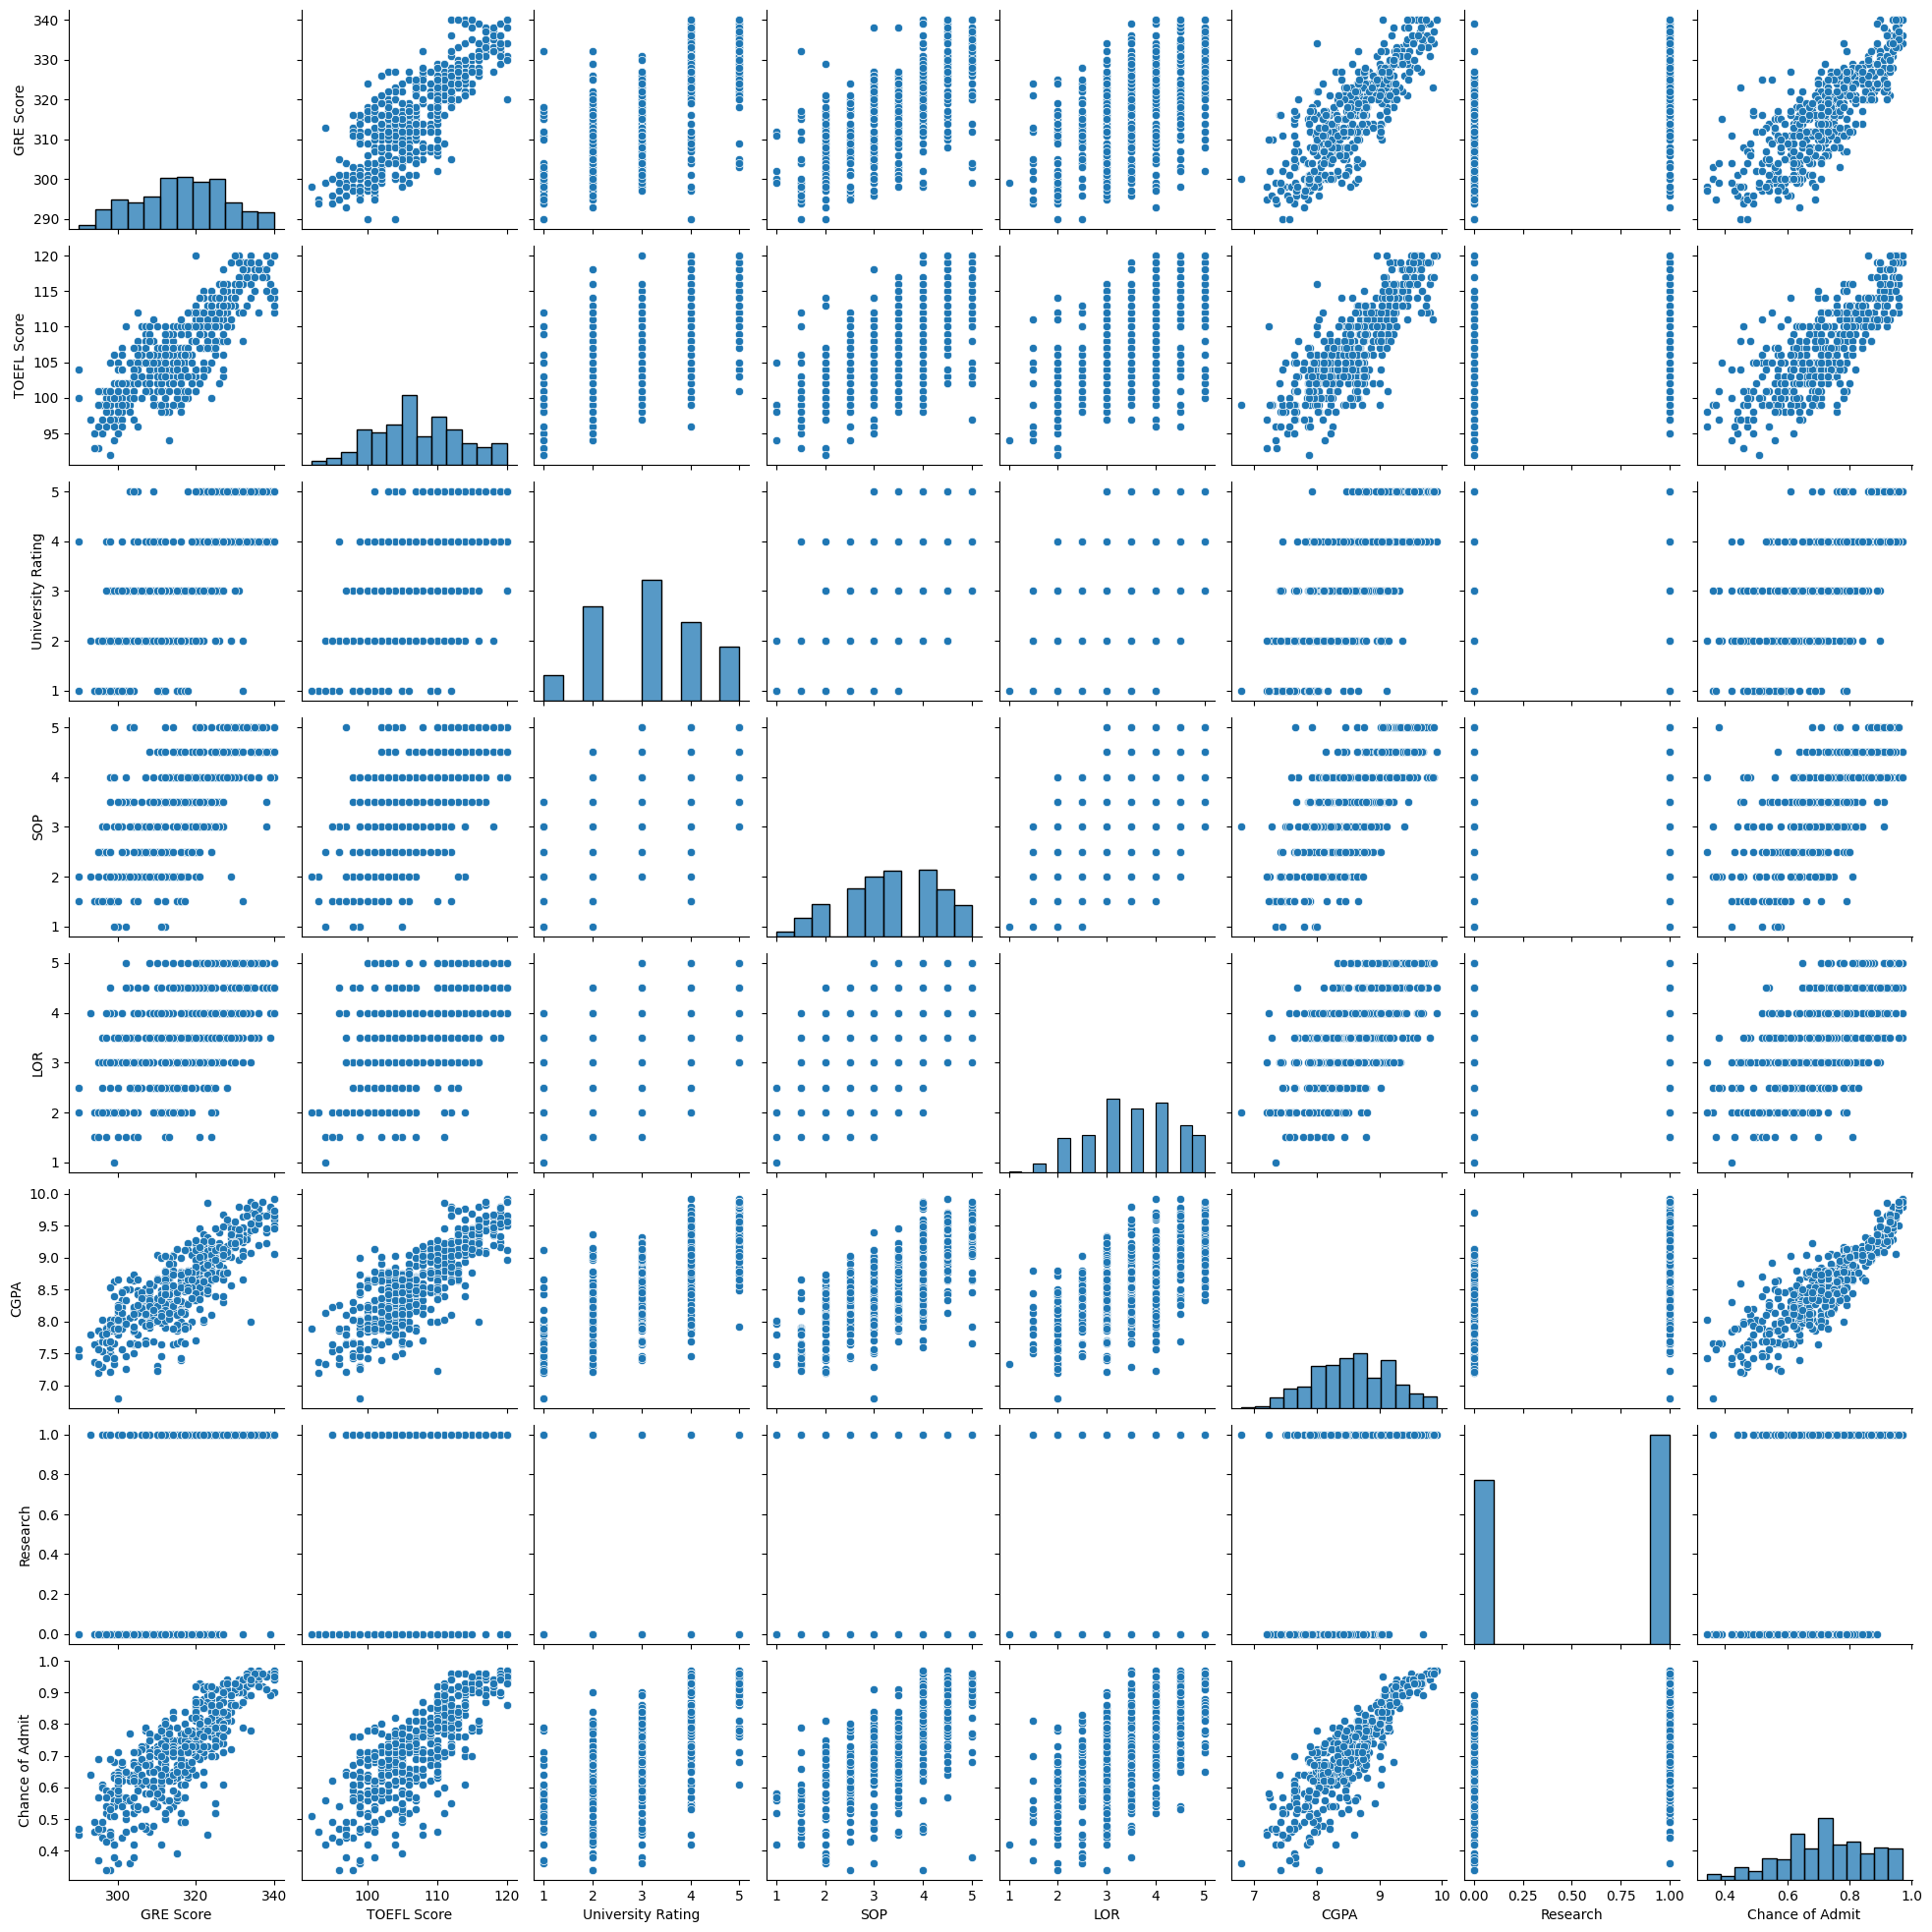

In [31]:
sns.pairplot(data=df)

In [32]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

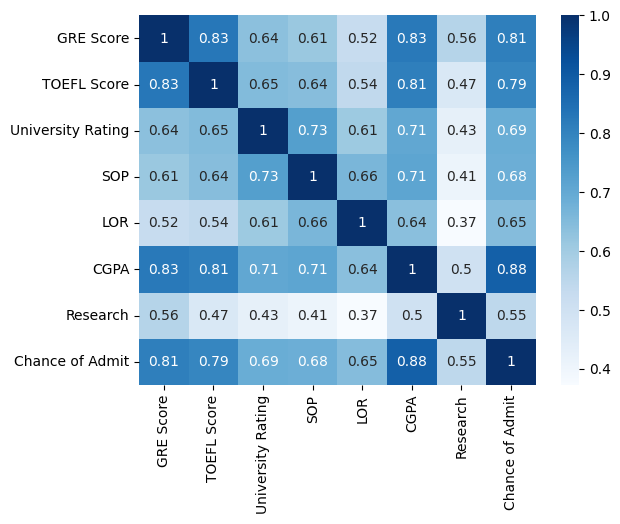

In [33]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Data Preprocessing

In [34]:
df[df.duplicated]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [35]:
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [36]:
col=['GRE Score','TOEFL Score']

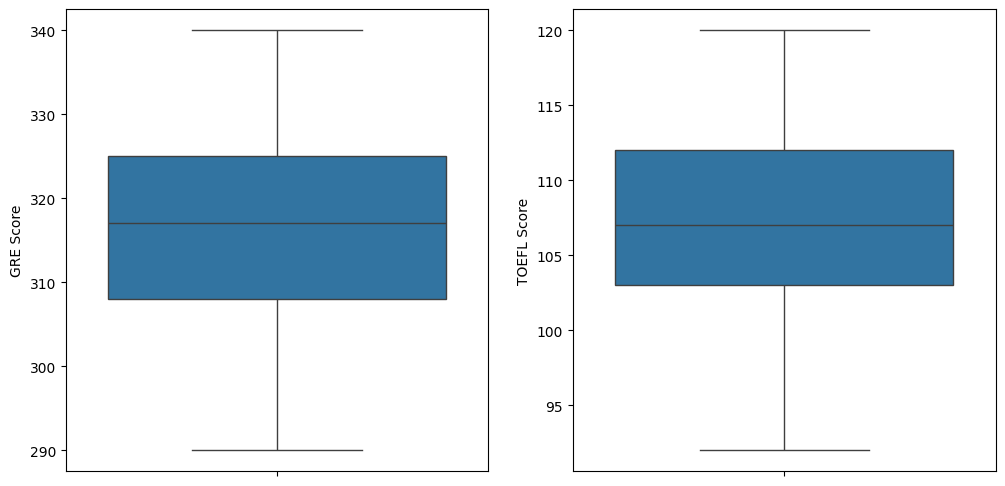

In [37]:
plt.figure(figsize=(12,6))
count=1
for i in col:
  plt.subplot(1,2,count)
  sns.boxplot(data=df,y=i)
  plt.ylabel(i)
  count+=1
plt.show()

In [38]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)

In [39]:
IQR=q3-q1

In [40]:
lower_bound=q1-IQR*1.5
upper_bound=q3+IQR*1.5

In [41]:
lower_bound

,0
GRE Score,282.50000
TOEFL Score,89.50000
University Rating,-1.00000
SOP,0.25000
LOR,1.50000
CGPA,6.75875
Research,-1.50000
Chance of Admit,0.34500


In [42]:
print(min(df['GRE Score']))
print(min(df['TOEFL Score']))
print(min(df['University Rating']))
print(min(df['SOP']))
print(min(df['LOR']))
print(min(df['CGPA']))
print(min(df['Research']))

290
92
1
1.0
1.0
6.8
0


In [43]:
upper_bound

,0
GRE Score,350.50000
TOEFL Score,125.50000
University Rating,7.00000
SOP,6.25000
LOR,5.50000
CGPA,10.40875
Research,2.50000
Chance of Admit,1.10500


In [44]:
print(max(df['GRE Score']))
print(max(df['TOEFL Score']))
print(max(df['University Rating']))
print(max(df['SOP']))
print(max(df['LOR']))
print(max(df['CGPA']))
print(max(df['Research']))

340
120
5
5.0
5.0
9.92
1


In [45]:
df[((df<lower_bound)|(df>upper_bound).any(axis=1))].any()

,0
GRE Score,False
TOEFL Score,False
University Rating,False
SOP,False
LOR,True
CGPA,False
Research,False
Chance of Admit,True


In [46]:
df=df[((df>lower_bound)&(df<upper_bound)).any(axis=1)]

In [47]:
df.shape

(500, 8)

In [48]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#Model building

since Outliers are not present we can use MinMaxscaler or StandardScaler

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [52]:
x=df.drop(columns='Chance of Admit')
y=df[['Chance of Admit']]

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x_train.shape

(400, 7)

In [55]:
y_train.shape

(400, 1)

In [56]:
x_test.shape

(100, 7)

In [57]:
y_test.shape

(100, 1)

In [58]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [61]:
y_train_pred_linear=model.predict(x_train_scaled)
y_train_pred_linear

array([[0.79319678],
       [0.74507858],
       [0.64401532],
       [0.67274778],
       [0.65094595],
       [0.54916269],
       [0.72581613],
       [0.80517894],
       [0.63303132],
       [0.68811779],
       [0.64924268],
       [0.95289497],
       [0.84653676],
       [0.96863011],
       [0.46641449],
       [0.82149658],
       [0.67146854],
       [0.88635893],
       [0.49256047],
       [0.68574539],
       [0.71763218],
       [0.88677469],
       [0.72363358],
       [0.74858906],
       [0.69122802],
       [0.69069927],
       [0.5691487 ],
       [0.99211793],
       [0.84286454],
       [0.51255247],
       [0.72510392],
       [0.72307643],
       [0.84332283],
       [0.52085083],
       [0.82678515],
       [0.5026812 ],
       [0.82394811],
       [0.96025707],
       [0.66361992],
       [0.6781819 ],
       [0.79599956],
       [0.61913284],
       [0.81894967],
       [0.52916542],
       [0.94791192],
       [0.65537821],
       [0.96318716],
       [0.782

In [62]:
y_linear_pred=model.predict(x_test_scaled)
y_linear_pred

array([[0.91457473],
       [0.79518127],
       [0.57265986],
       [0.70736968],
       [0.81588282],
       [0.86206561],
       [0.47459746],
       [0.64850923],
       [0.82378728],
       [0.80741498],
       [0.72193204],
       [0.72589118],
       [0.65632227],
       [0.93677168],
       [0.8241518 ],
       [0.50979177],
       [0.83931942],
       [0.59727295],
       [0.53339576],
       [0.57155958],
       [0.66548168],
       [0.55305833],
       [0.72232308],
       [0.79506004],
       [0.78027648],
       [0.60248654],
       [0.94840363],
       [0.84741471],
       [0.62777011],
       [0.74343096],
       [0.55533035],
       [0.73004034],
       [0.54474225],
       [0.86116288],
       [0.65713016],
       [0.7371816 ],
       [0.55423839],
       [0.95718977],
       [0.64364267],
       [0.71057279],
       [0.97036982],
       [0.57495143],
       [0.67075391],
       [0.85830422],
       [0.94112903],
       [0.57793762],
       [0.9583926 ],
       [0.839

In [63]:
coefecient=model.coef_
coefecient

array([[0.02667052, 0.01822633, 0.00293995, 0.001788  , 0.0158655 ,
        0.06758106, 0.01194049]])

In [64]:
coefecient=coefecient.flatten()
coefecient

array([0.02667052, 0.01822633, 0.00293995, 0.001788  , 0.0158655 ,
       0.06758106, 0.01194049])

In [65]:
Feature_coefecient=pd.DataFrame({'Features':x_train.columns,'Coefecients':coefecient})
Feature_coefecient

,Features,Coefecients
0,GRE Score,0.026671
1,TOEFL Score,0.018226
2,University Rating,0.002940
3,SOP,0.001788
4,LOR,0.015866
5,CGPA,0.067581
6,Research,0.011940


In [66]:
model.score(x_train_scaled,y_train)

0.8210671369321554

In [67]:
model.score(x_test_scaled,y_test)

0.8188432567829627

#OLS Stats Model

In [68]:
import statsmodels.api as sm

In [69]:
x_sm=sm.add_constant(x_train_scaled)

In [70]:
result=sm.OLS(y_train,x_sm).fit()

In [71]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          3.41e-142
Time:                        07:40:00   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.441      0.0

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
def adj_r(r_sq,x,y):
  adj=1-(((1-r_sq)*(len(y)-1))/(len(y)-x.shape[1]-1))
  return adj

In [75]:
train_errors=[]
test_errors=[]
train_scores=[]
test_scores=[]
for i in range(1,4):
  poly=PolynomialFeatures(i)
  x_train_poly=poly.fit_transform(x_train)
  x_test_poly=poly.transform(x_test)
  x_train_scaled=scaler.fit_transform(x_train_poly)
  x_test_scaled=scaler.transform(x_test_poly)
  mode=LinearRegression()
  mode.fit(x_train_scaled,y_train)
  output1=mode.predict(x_train_scaled)
  output2=mode.predict(x_test_scaled)
  train_error=mean_squared_error(y_train,output1)
  test_error=mean_squared_error(y_test,output2)

  train_score=mode.score(x_train_scaled,y_train)
  test_score=mode.score(x_test_scaled,y_test)
  print("degree",i,"Mean_squared_error",train_error," Adjusted R^2 for train",adj_r(train_score,x_train,y_train))

  train_errors.append(train_error)
  test_errors.append(test_error)

  train_scores.append(adj_r(train_score,x_train,y_train))
  test_scores.append(adj_r(test_score,x_test,y_test))


degree 1 Mean_squared_error 0.003526555478455758  Adjusted R^2 for train 0.8178719072345153
degree 2 Mean_squared_error 0.0032362611713723155  Adjusted R^2 for train 0.832864085526557
degree 3 Mean_squared_error 0.0025084552004958714  Adjusted R^2 for train 0.8704514463915285


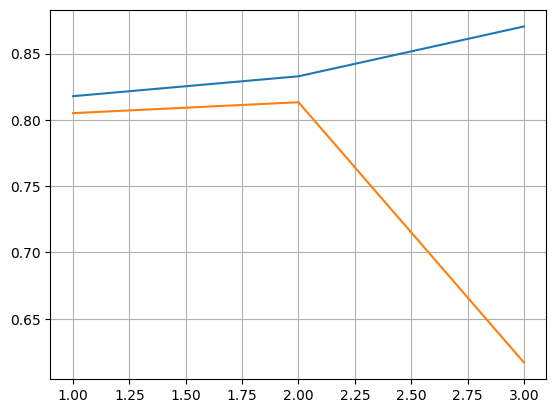

In [76]:
plt.plot(list(np.arange(1,4)),train_scores)
plt.plot(list(np.arange(1,4)),test_scores)
plt.grid()

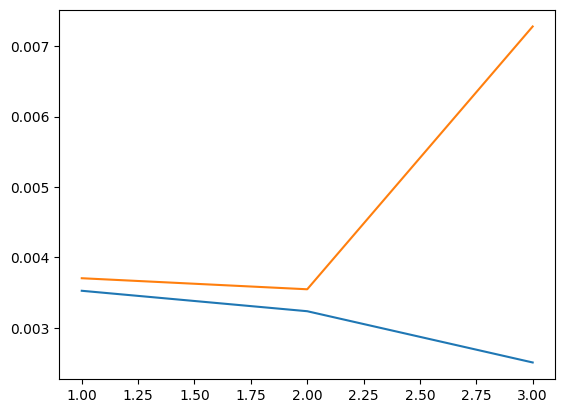

In [77]:
plt.plot(list(np.arange(1,4)),train_errors)
plt.plot(list(np.arange(1,4)),test_errors)

Take degree =2 is best

let's do hyperparamter tuning

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_train_scaled=scaler.fit_transform(x_train_poly)
x_test_poly=poly.transform(x_test)
x_test_scaled=scaler.transform(x_test_poly)

In [80]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [81]:
for lambd in [0.001,0.01,10,100,500,1000]:
  lasso=Lasso(alpha=lambd)
  lasso.fit(x_train_scaled,y_train)
  lasso.predict(x_test_scaled)
  train_adj_score=adj_r(lasso.score(x_train_scaled,y_train),x_train,y_train)
  test_adj_score=adj_r(lasso.score(x_test_scaled,y_test),x_test,y_test)
  print('for lambda ',lambd,"Adjusted R^2 is",train_adj_score,"Adjusted r^2 for test",test_adj_score)

for lambda  0.001 Adjusted R^2 is 0.8194033989640347 Adjusted r^2 for test 0.809683880023635
for lambda  0.01 Adjusted R^2 is 0.809638619457507 Adjusted r^2 for test 0.8046730555723831
for lambda  10 Adjusted R^2 is -0.017857142857142794 Adjusted r^2 for test -0.08388690968161971
for lambda  100 Adjusted R^2 is -0.017857142857142794 Adjusted r^2 for test -0.08388690968161971
for lambda  500 Adjusted R^2 is -0.017857142857142794 Adjusted r^2 for test -0.08388690968161971
for lambda  1000 Adjusted R^2 is -0.017857142857142794 Adjusted r^2 for test -0.08388690968161971


take alpha=0.001

In [82]:
lasso_model=Lasso(alpha=0.001)
lasso_model.fit(x_train_scaled,y_train)

Lasso(alpha=0.001)

In [83]:
lasso_y_pred=lasso_model.predict(x_test_scaled)

In [84]:
coefecient_lasso=lasso_model.coef_
coefecient

array([0.02667052, 0.01822633, 0.00293995, 0.001788  , 0.0158655 ,
       0.06758106, 0.01194049])

In [85]:
lass_coefs=pd.DataFrame({'Features':x_train.columns,'Coefecients':coefecient})

In [86]:
lass_coefs

,Features,Coefecients
0,GRE Score,0.026671
1,TOEFL Score,0.018226
2,University Rating,0.002940
3,SOP,0.001788
4,LOR,0.015866
5,CGPA,0.067581
6,Research,0.011940


In [87]:
lasso_model.intercept_

array([0.724175])

In [88]:
lasso_model.score(x_train_scaled,y_train)

0.8225717603857183

In [89]:
lasso_model.score(x_test_scaled,y_test)

0.8231405753754992

#Ridge Model

In [90]:
#Hyperparameter Tuning

In [91]:
for lambd in [10,50,100,400,500,800,900,1000,5000]:
  ridge=Ridge(alpha=lambd)
  ridge.fit(x_train_scaled,y_train)
  ridge.predict(x_test_scaled)
  train_adj_score=adj_r(ridge.score(x_train_scaled,y_train),x_train,y_train)
  test_adj_score=adj_r(ridge.score(x_test_scaled,y_test),x_test,y_test)
  print('for lambda ',lambd,"Adjusted R^2 is",train_adj_score,"Adjusted r^2 for test",test_adj_score)

for lambda  10 Adjusted R^2 is 0.8202706910816172 Adjusted r^2 for test 0.8095414984397544
for lambda  50 Adjusted R^2 is 0.8169476782686271 Adjusted r^2 for test 0.8065413203726433
for lambda  100 Adjusted R^2 is 0.8146767513133575 Adjusted r^2 for test 0.8055548041860298
for lambda  400 Adjusted R^2 is 0.8018922710506671 Adjusted r^2 for test 0.8006737656356724
for lambda  500 Adjusted R^2 is 0.797992182050829 Adjusted r^2 for test 0.7986197540422915
for lambda  800 Adjusted R^2 is 0.787276658859879 Adjusted r^2 for test 0.7917102036655073
for lambda  900 Adjusted R^2 is 0.7839622703298341 Adjusted r^2 for test 0.7892581003500181
for lambda  1000 Adjusted R^2 is 0.7807450743429541 Adjusted r^2 for test 0.7867596224288451
for lambda  5000 Adjusted R^2 is 0.6710611342091971 Adjusted r^2 for test 0.6759601524117649


Choose alpha=10 for ridge

In [92]:
ridge_model=Ridge(alpha=10)
ridge_model.fit(x_train_scaled,y_train)

Ridge(alpha=10)

In [93]:
ridge_model.predict(x_train_scaled)

array([0.7881467 , 0.74044257, 0.63939029, 0.67725744, 0.65200863,
       0.55082393, 0.72485464, 0.80155802, 0.63162202, 0.67978153,
       0.64039703, 0.95942159, 0.84549059, 0.97681463, 0.48027474,
       0.81574472, 0.6734533 , 0.89231354, 0.49008439, 0.68059584,
       0.71185039, 0.88730968, 0.72132422, 0.74456408, 0.69095244,
       0.68815052, 0.56842012, 0.9964865 , 0.83911798, 0.5167944 ,
       0.72309018, 0.71886999, 0.84812081, 0.5248347 , 0.8191493 ,
       0.50462314, 0.83222242, 0.96736062, 0.66502086, 0.67075589,
       0.78878506, 0.62102426, 0.82029595, 0.52941699, 0.94901078,
       0.65476742, 0.9727085 , 0.77417066, 0.64231631, 0.71887562,
       0.88485856, 0.65168434, 0.84080522, 0.70883394, 0.59721662,
       0.60533723, 0.74662486, 0.80185474, 0.51734674, 0.60670276,
       0.65789219, 0.75459787, 0.7304376 , 0.50150349, 0.61617943,
       0.6331217 , 0.75300667, 0.60606198, 0.74603065, 0.92734324,
       0.55188324, 0.62453204, 0.68868053, 0.49853437, 0.68928

In [94]:
ridge_model.predict(x_test_scaled)

array([0.91563665, 0.79609368, 0.57769175, 0.70119933, 0.81177044,
       0.86313737, 0.49107436, 0.63860427, 0.81768842, 0.80163361,
       0.71580305, 0.71910112, 0.65949634, 0.94453352, 0.81958767,
       0.51462263, 0.84793194, 0.59595769, 0.53680004, 0.56855309,
       0.66060679, 0.5526607 , 0.71854429, 0.79036803, 0.7753147 ,
       0.60209837, 0.95458144, 0.84893143, 0.63055601, 0.74583308,
       0.55525385, 0.7223968 , 0.54789525, 0.85984951, 0.6557492 ,
       0.73229463, 0.56596453, 0.965391  , 0.6429756 , 0.70453701,
       0.97180395, 0.57539419, 0.66515496, 0.85860264, 0.94704576,
       0.57835733, 0.95994356, 0.83828339, 0.79595263, 0.93330602,
       0.89503269, 0.56994719, 0.69800249, 0.54289735, 0.96032556,
       0.59783971, 0.95783308, 0.73105293, 0.65951021, 0.50792009,
       0.62700559, 0.6742536 , 0.60081871, 0.59152393, 0.46014   ,
       0.59001137, 0.86671256, 0.90102013, 0.65332454, 0.69850454,
       0.61545047, 0.78176286, 0.69124638, 0.56953298, 0.56633

In [95]:
coefs=np.round(ridge_model.coef_,2)
coefs

array([ 0.  ,  0.01,  0.01, -0.  ,  0.  ,  0.01,  0.03,  0.  ,  0.01,
        0.  , -0.  ,  0.  ,  0.01,  0.02, -0.  ,  0.  , -0.  ,  0.  ,
        0.  ,  0.01, -0.  ,  0.  ,  0.02, -0.  , -0.  ,  0.01, -0.01,
       -0.  ,  0.  ,  0.01,  0.  ,  0.  , -0.01,  0.02,  0.  ,  0.  ])

In [96]:
ridge_model.score(x_train_scaled,y_train)

0.8234238368521152

In [97]:
ridge_model.score(x_test_scaled,y_test)

0.8230082611763375

#Testing the assumptions of the linear regression model

Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)

In [98]:
x_train.shape

(400, 7)

In [99]:
y_train.shape

(400, 1)

In [100]:
x_train_scaled=scaler.fit_transform(x_train)

In [101]:
x_t=pd.DataFrame(x_train_scaled,columns=x_train.columns)

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
import statsmodels.api as sm

In [104]:
adjr_thr=0.81
vif_thr=5
feats_removed=[]
col=x_train.columns
while True:
  vif=pd.DataFrame()
  x_t=pd.DataFrame(x_train_scaled,columns=x_train.columns)[col]
  vif['Features']=x_t.columns
  vif['VIF']=[variance_inflation_factor(x_t.values,i) for i in range(x_t.shape[1])]
  vif['VIF']=round(vif['VIF'],2)
  vif=vif.sort_values(by='VIF',ascending=False)
  print(vif)
  col=vif['Features'][1:].values

  x2=pd.DataFrame(x_train_scaled,columns=x_train.columns)[col]

  x_sm=sm.add_constant(x2)
  y_train=np.array(y_train)
  sm_model=sm.OLS(y_train,x_sm).fit()

  if (vif.iloc[0,1]<=vif_thr) or (sm_model.rsquared_adj<=adjr_thr):
    print("Reached Threshold")
    print('Highest VIF',vif.iloc[0])
    print('Adjusted R square',sm_model.rsquared_adj)
    print('removed features',feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])

            Features   VIF
5               CGPA  4.65
0          GRE Score  4.49
1        TOEFL Score  3.66
3                SOP  2.79
2  University Rating  2.57
4                LOR  1.98
6           Research  1.52
Reached Threshold
Highest VIF Features    CGPA
VIF         4.65
Name: 5, dtype: object
Adjusted R square 0.7677886218164505
removed features []


There exists very little multicollinearity so no required to remove any columns

#The mean of residuals is nearly zero

In [105]:
errors=y_train-y_train_pred_linear

In [106]:
np.round(errors.mean(),2)

np.float64(0.0)

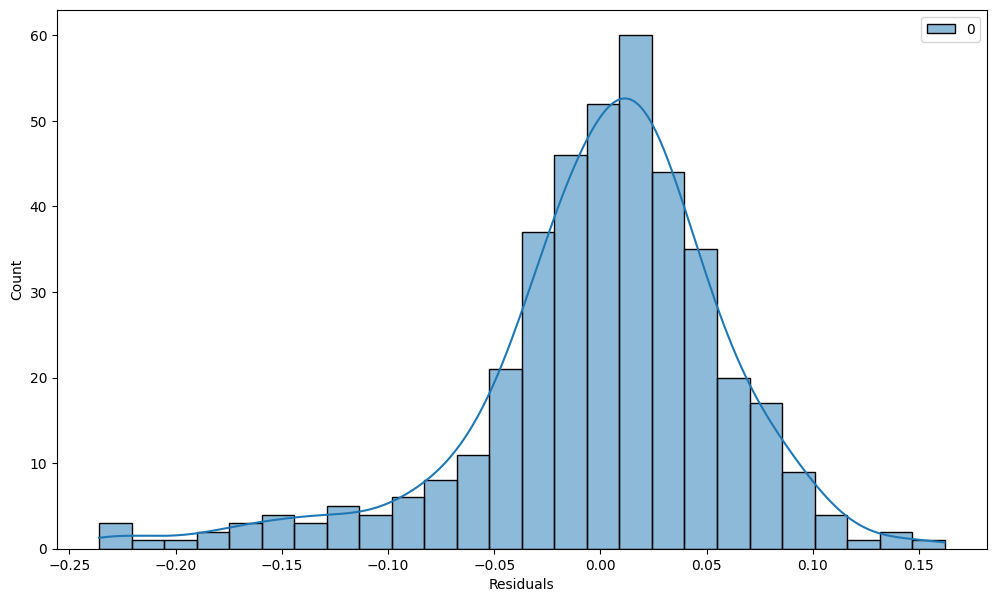

In [107]:
plt.figure(figsize=(12,7))
sns.histplot(errors,kde=True)
plt.xlabel('Residuals')
plt.show()

The mean of residuals is nearly zero

#Linearity of variables

In [108]:
errors=y_train-y_train_pred_linear

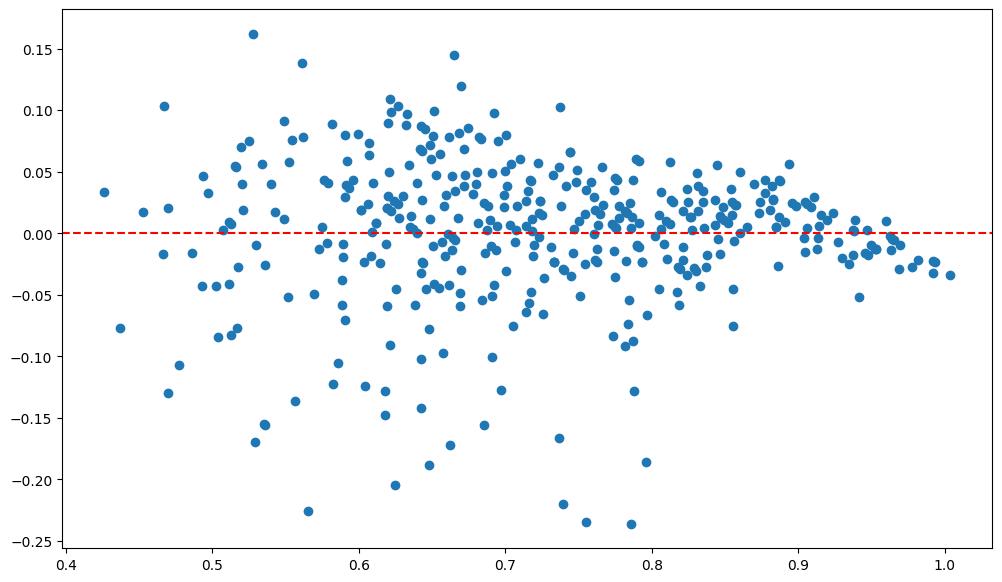

In [109]:
plt.figure(figsize=(12,7))
plt.scatter(y_train_pred_linear,errors)
plt.axhline(y=0,color='red',linestyle="--")
plt.show()

, we can say that there is linear relationship between dependent variable and
independent variables.

#Test for Homoscedasticity

In [110]:
#Let's plot Residual vs predicted values

In [111]:
errors=y_train-y_train_pred_linear

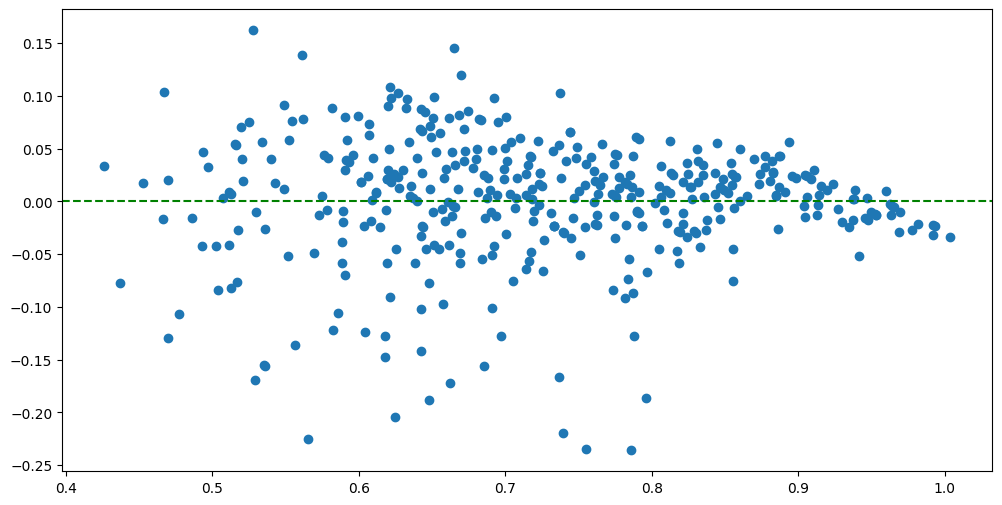

In [112]:
plt.figure(figsize=(12,6))
plt.scatter(y_train_pred_linear,errors)
plt.axhline(y=0,linestyle="--",color='Green')
plt.show()

Null Hypothesis -- H0 : Homoscedasticity is present in residuals.

Alternate Hypothesis -- Ha : Heteroscedasticity is present in residuals.

alpha : 0.05

In [113]:
x_sm=sm.add_constant(x_train_scaled)

In [114]:
import statsmodels.stats.api as sms

In [115]:
t_stats,p_value,f=sms.het_goldfeldquandt(y_train,x_sm)

In [116]:
print(t_stats)

0.9506884043302335


In [117]:
print(p_value)

0.6367845922442998


In [118]:
if p_value>=0.05:
  print("Failed to reject Null Hypothesis")
  print("Homoskedascity")
else:
  print("Reject Null Hypothesis")
  print("Hetroskedascity")

Failed to reject Null Hypothesis
Homoskedascity


Hence it is Homoskedacity

#Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

In [119]:
erros=y_train-model.predict(x_train_scaled)

Histplot

<Axes: ylabel='Count'>

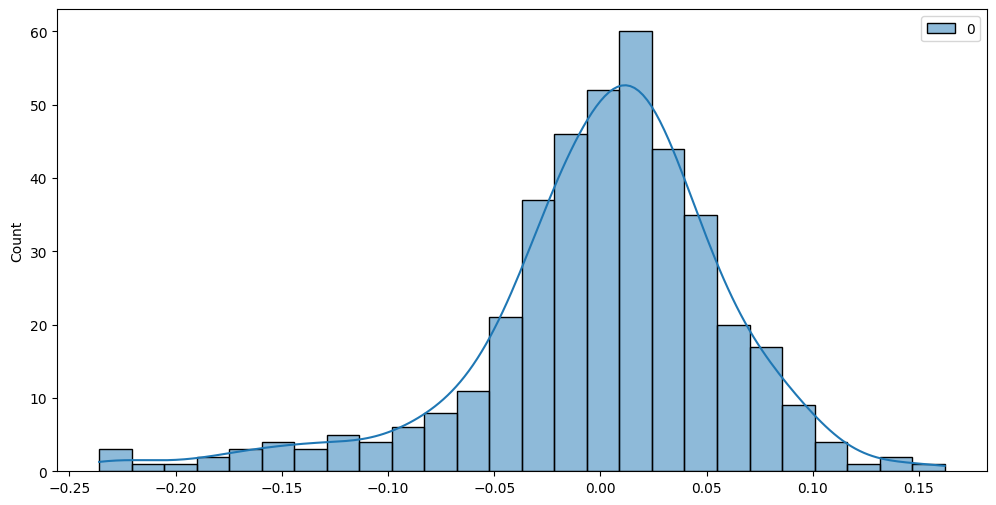

In [120]:
plt.figure(figsize=(12,6))
sns.histplot(erros,kde=True)

QQplot

In [121]:
from statsmodels.graphics.gofplots import qqplot

In [122]:
x.shape

(500, 7)

In [123]:
y.shape

(500, 1)

In [124]:
x_train.shape

(400, 7)

In [125]:
y_train.shape

(400, 1)

In [126]:
x_train_scaled.shape

(400, 7)

In [127]:
m1=LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [128]:
y1=m1.predict(x_train)

In [129]:
residual=y_train-y1

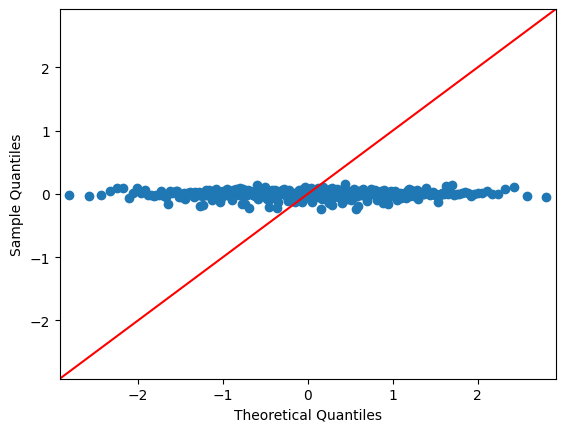

In [130]:
qqplot(residual,line='45')
plt.show()

In [131]:
from scipy.stats import shapiro

In [132]:
t_stats,p_value=shapiro(residual)

In [133]:
print(t_stats,p_value)

0.9291008662710207 7.734906730602309e-13


In [134]:
if p_value>0.05:
  print('Normally Distributed')
else:
  print("skewed Distribution")

skewed Distribution


from The above tests we can see that the data is left skewed

#Model performance evaluation

Train and test performances are checked

LinearRegression

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [137]:
scaler=StandardScaler()

In [138]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [139]:
model_linear=LinearRegression()
model_linear.fit(x_train_scaled,y_train)

LinearRegression()

In [140]:
y_train_pred=model_linear.predict(x_train_scaled)

In [141]:
y_test_pred=model_linear.predict(x_test_scaled)

In [142]:
def adj_r(r_sq,x,y):
  adj_r=1-(((1-r_sq)*(len(y)-1))/(len(y)-x.shape[1]-1))
  return adj_r

In [143]:
print("For Training Data")
print("Mean squared Error of Train",mean_squared_error(y_train,y_train_pred))
print("Mean Absolute Error of Train",mean_absolute_error(y_train,y_train_pred))
print("RMSE for Train",root_mean_squared_error(y_train,y_train_pred))
print("R-Score for Train",model_linear.score(x_train_scaled,y_train))
print("Adjusted R score",adj_r(model_linear.score(x_train_scaled,y_train),x_train,y_train))
print("-"*65)

print("For Test Data")
print("Mean squared Error of Test",mean_squared_error(y_test,y_test_pred))
print("Mean Absolute Error of Test",mean_absolute_error(y_test,y_test_pred))
print("RMSE for Test",root_mean_squared_error(y_test,y_test_pred))
print("R-Score for Test",model_linear.score(x_test_scaled,y_test))
print("Adjusted R score",adj_r(model_linear.score(x_test_scaled,y_test),x_test,y_test))

For Training Data
Mean squared Error of Train 0.003573352563877968
Mean Absolute Error of Train 0.04294488315548092
RMSE for Train 0.05977752557506849
R-Score for Train 0.8215099192361265
Adjusted R score 0.818322596365343
-----------------------------------------------------------------
For Test Data
Mean squared Error of Test 0.003459098897136384
Mean Absolute Error of Test 0.040200193804157944
RMSE for Test 0.0588141045765077
R-Score for Test 0.8208741703103731
Adjusted R score 0.807245031094858


Lasso Model performance evaluation

In [144]:
from sklearn.linear_model import Lasso

In [145]:
model_lasso=Lasso(alpha=0.001)
model_lasso.fit(x_train_scaled,y_train)

Lasso(alpha=0.001)

In [146]:
y_train_pred=model_lasso.predict(x_train_scaled)

In [147]:
y_test_pred=model_lasso.predict(x_test_scaled)

In [148]:
print("For Training Data")
print("Mean squared Error of Train",mean_squared_error(y_train,y_train_pred))
print("Mean Absolute Error of Train",mean_absolute_error(y_train,y_train_pred))
print("RMSE for Train",root_mean_squared_error(y_train,y_train_pred))
print("R-Score for Train",model_lasso.score(x_train_scaled,y_train))
print("Adjusted R score",adj_r(model_lasso.score(x_train_scaled,y_train),x_train,y_train))
print("-"*65)

print("For Test Data")
print("Mean squared Error of Test",mean_squared_error(y_test,y_test_pred))
print("Mean Absolute Error of Test",mean_absolute_error(y_test,y_test_pred))
print("RMSE for Test",root_mean_squared_error(y_test,y_test_pred))
print("R-Score for Test",model_lasso.score(x_test_scaled,y_test))
print("Adjusted R score",adj_r(model_lasso.score(x_test_scaled,y_test),x_test,y_test))

For Training Data
Mean squared Error of Train 0.0035749907121858304
Mean Absolute Error of Train 0.0429606559607491
RMSE for Train 0.05979122604685265
R-Score for Train 0.8214280932146112
Adjusted R score 0.8182393091648721
-----------------------------------------------------------------
For Test Data
Mean squared Error of Test 0.0034785689797310554
Mean Absolute Error of Test 0.040225003588944166
RMSE for Test 0.05897939453513452
R-Score for Test 0.8198659323840788
Adjusted R score 0.8061600794133021


Ridge Model

In [149]:
from sklearn.linear_model import Ridge

In [150]:
model_ridge=Ridge(alpha=10)
model_ridge.fit(x_train_scaled,y_train)

Ridge(alpha=10)

In [151]:
y_train_pred=model_ridge.predict(x_train_scaled)

In [152]:
y_test_pred=model_ridge.predict(x_test_scaled)

In [153]:
print("For Training Data")
print("Mean squared Error of Train",mean_squared_error(y_train,y_train_pred))
print("Mean Absolute Error of Train",mean_absolute_error(y_train,y_train_pred))
print("RMSE for Train",root_mean_squared_error(y_train,y_train_pred))
print("R-Score for Train",model_ridge.score(x_train_scaled,y_train))
print("Adjusted R score",adj_r(model_ridge.score(x_train_scaled,y_train),x_train,y_train))
print("-"*65)

print("For Test Data")
print("Mean squared Error of Test",mean_squared_error(y_test,y_test_pred))
print("Mean Absolute Error of Test",mean_absolute_error(y_test,y_test_pred))
print("RMSE for Test",root_mean_squared_error(y_test,y_test_pred))
print("R-Score for Test",model_ridge.score(x_test_scaled,y_test))
print("Adjusted R score",adj_r(model_ridge.score(x_test_scaled,y_test),x_test,y_test))

For Training Data
Mean squared Error of Train 0.0035806410631411835
Mean Absolute Error of Train 0.042897042008224126
RMSE for Train 0.05983845806119325
R-Score for Train 0.821145856413082
Adjusted R score 0.8179520324204586
-----------------------------------------------------------------
For Test Data
Mean squared Error of Test 0.0034837003820173446
Mean Absolute Error of Test 0.04048035282211973
RMSE for Test 0.05902288015691325
R-Score for Test 0.8196002080670424
Adjusted R score 0.8058741369417086
